# Introdução

Este projeto visa analisar os dados sobre a personalidade dos consumidores, para assim tentar entender seus padrões e comportamentos de compras e saber como aplicar estratégias de marketing, de novas campanhas e de vendas de forma mais específica e otimizada para uma maior taxa de conversão.

O dataset utilizado nesse projeto foi o "Customer Personality Analysis" e pode ser encontrado no kaggle.

# Importing Libraries

In [1]:
# Importação dos módulos e configurações

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
# Dataset

df = pd.read_csv("/content/marketing_campaign.csv", sep='\t')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Data Cleaning and Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Já que a colunas Z_CostContact e Z_Revenue não possuem nenhum descrição e seus dados são todos iguais elas serão deletadas

In [6]:
df.drop(labels=['Z_CostContact','Z_Revenue'], axis='columns', inplace=True)

Verificar a existência de dados duplicados

In [7]:
df.duplicated().sum()

0

Verificação da existência de dados faltantes

In [8]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

Deletar as linhas que possuem dados faltantes

In [9]:
df.dropna(inplace=True)

# Exploratory Data Analysis

Analisar a distribuição da faixa etária

In [10]:
from datetime import date
current_date = date.today()

df['Age'] = current_date.year - df['Year_Birth']

fig = px.histogram(df, x='Age', title='Distribuição da faixa etária')
fig.show()

Como deve ser improvável que realmente tenha algum cliente com mais de 100 anos, irei deletar esses valores.

In [11]:
df = df[df['Age'] < 100]

In [12]:
fig = px.box(df, x='Age', title='Distribuição da faixa etária')
fig.show()

Analisar os dados de renda dos consumidores

In [13]:
fig = px.box(df, x='Income', title='Renda dos consumidores')
fig.show()

Deletar os valores de renda superiores a 114 mil, pois eles são outliers.

In [14]:
df = df[df['Income'] < 114000]

In [15]:
df.shape

(2205, 28)

Analisar a distribuição de gastos por categoria de produto

In [16]:
df_categories = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].melt()

In [17]:
fig = px.pie(df_categories, names='variable', values='value', title='Gastos dos consumidores por categoria de produto')
fig.show()

Analisar a distribuição dos canais de consumo

In [18]:
df_channels = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].melt()

In [19]:
fig = px.pie(df_channels, names='variable', values='value', title='Distribuição dos canais de consumo')
fig.show()

Analisar o gasto médio dos consumidores por compra

In [20]:
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['NumTotalPurchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['AverageSpend'] = df['MntTotal']/df['NumTotalPurchases']

In [21]:
fig = px.histogram(df, x='AverageSpend')
fig.show()

In [22]:
fig = px.box(df, x='AverageSpend')
fig.show()

Analisar a distribuição de consumo entre os diferentes níveis de escolaridade para cada tipo de produto

In [23]:
df_education = df.groupby(['Education']).mean()
df_education = df_education[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [24]:
fig = px.bar(df_education, height=700, width=1200)
fig.show()

Analisar a relação entre o consumo e o estado civil

In [25]:
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Remover as linhas que tem como Marital_Status 'Absurd' e 'YOLO' por não fazerem sentido para análise.

In [26]:
df = df[(df['Marital_Status'] != 'Absurd') & (df['Marital_Status'] != 'YOLO')]

Agrupar os dados de 'Alone' com 'Single', pois representam a mesma situação.

In [27]:
df = df.replace({'Alone': 'Single'})

Relação entre o consumo total e o estado civil

In [28]:
fig = px.box(df, x='Marital_Status', y='MntTotal', title='Relação entre o consumo total e o estado civil')
fig.show()

Relação entre o consumo médio e o estado civil

In [29]:
fig = px.box(df, x='Marital_Status', y='AverageSpend', title='Relação entre o consumo médio e o estado civil')
fig.show()

- Analisar se existe correlação entre a presença de crianças ou adolescentes com um consumo maior.
- Analisar se pessoas com rendas maiores consomem mais produtos.

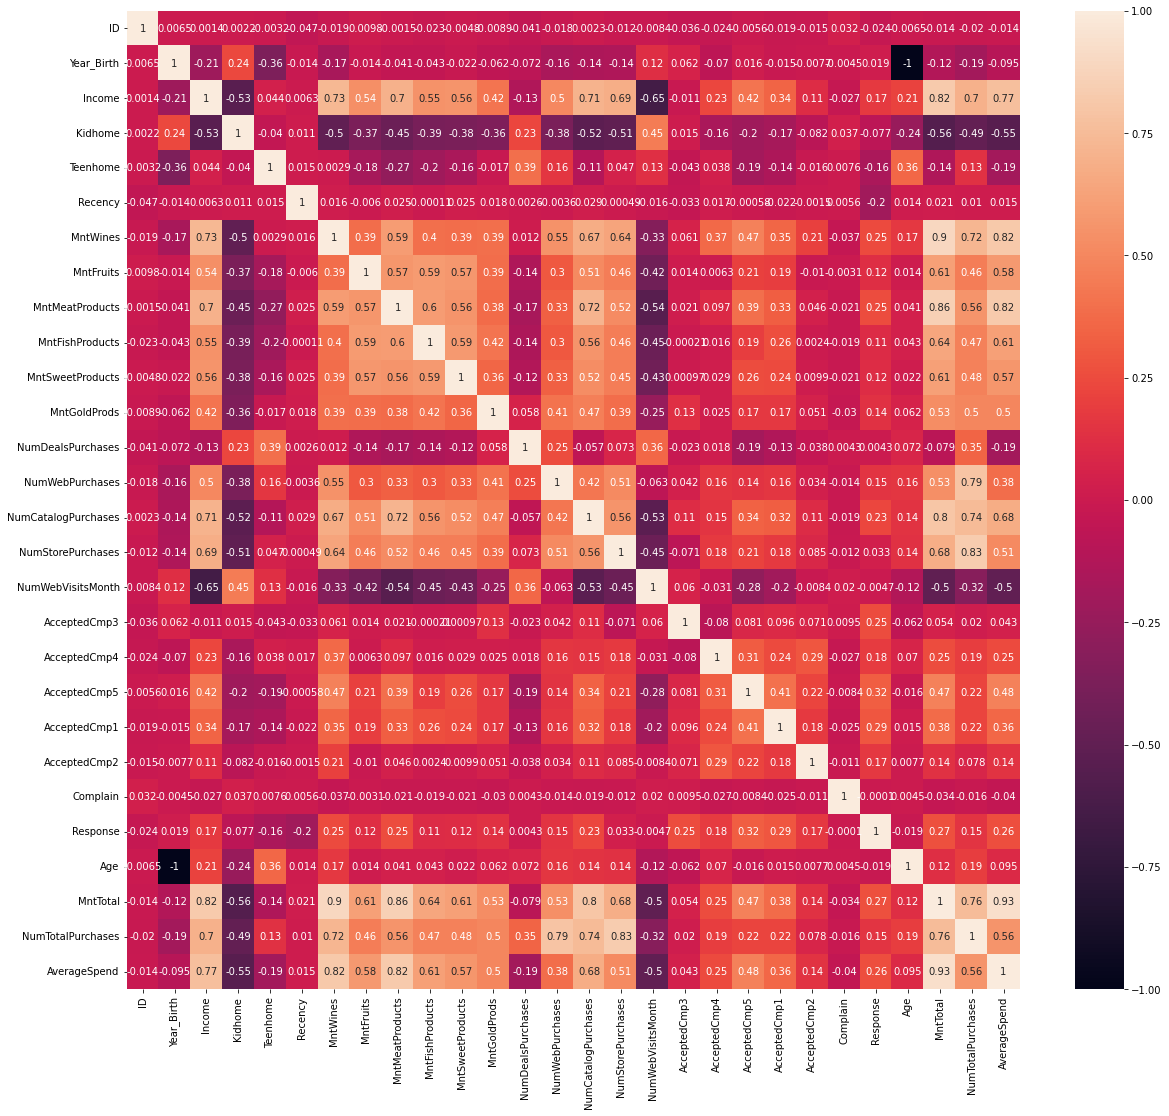

In [30]:
corr_matrix = df.corr()
plt.figure(figsize=(20,18))
sns.heatmap(corr_matrix, annot=True)

- Não existe correlação entre a presença de adolescentes com um consumo maior.
- Existe uma correlação negativa entre a presença de crianças com um maior consumo.
- Existe uma correlação positiva entre pessoas com maiores rendas e um maior consumo.

Verificar se essas correlações são estatisticamente significantes

In [31]:
from scipy.stats.stats import pearsonr

p_value_kids_mntTotal = pearsonr(df['Kidhome'], df['MntTotal'])[1]
print(f"p-value entre Kidhome e MntTotal: {p_value_kids_mntTotal:.4f}")
p_value_kids_totalPurchases = pearsonr(df['Kidhome'], df['NumTotalPurchases'])[1]
print(f"p-value entre Kidhome e NumTotalPurchases: {p_value_kids_totalPurchases:.4f}")
print()
p_value_income_mntTotal = pearsonr(df['Income'], df['MntTotal'])[1]
print(f"p-value entre Income e MntTotal: {p_value_income_mntTotal:.4f}")
p_value_income_totalPurchases = pearsonr(df['Income'], df['NumTotalPurchases'])[1]
print(f"p-value entre Income e NumTotalPurchases: {p_value_income_totalPurchases:.4f}")

p-value entre Kidhome e MntTotal: 0.0000
p-value entre Kidhome e NumTotalPurchases: 0.0000

p-value entre Income e MntTotal: 0.0000
p-value entre Income e NumTotalPurchases: 0.0000


Como todos os valores foram inferiores a 0.05 (p-value < 0.05) é possível afirmar com no mínimo 95% de significância que as correlações são verdadeiras.

# Conclusões

- Metade dos consumidores têm idades entre 45 e 63 anos.
- O consumo de vinhos é o mais relevante, representando 50,5% do total, seguido pelo consumo de carnes, que representa 27,2% do total.
- O canal de compra mais utilizado é pelas lojas físicas (46,3%), em sequência tem o canal web (32,6%) e por catálogos (21%).
- 50% dos clientes gastam em média mais de 23,38 por compra.
- Clientes com educação básica tendem a ter a mesma proporção de consumo entre os produtos, além de terem um consumo médio baixo. Já os outros clientes consomem, comparativamente, mais vinhos e carne do que os demais produtos, sendo que clientes com níveis de escolaridades superiores consomem mais desses tipos de produtos em valores absolutos.
- A média de consumo é muito similar entre os estados civis, exceto pelos(as) viúvos(as) que consomem um pouco a mais.
- Não existe nenhuma correlação entre a presença de adolescentes com um maior consumo.
- Foi comprovado que a presença de crianças gera uma diminuição no consumo.
- Foi comprovado que clientes com rendas maiores tendem a consumirem mais.

# Recomendações e Público-alvo

É recomendado que se mantenha, ou até mesmo aumente, o foco na venda dos vinhos - principalmente pelas lojas físicas - melhorando a quantidade e qualidade de opções e/ou aumentando o preço desse tipo de produto, para assim gerar um faturamento maior.

O público-alvo mais recomendado para focar em estratégias de marketing futuras são os clientes com um nível de escolaridade maior, que não possuem crianças em casa, e que tenham uma renda mais alta.